In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt

from src.utilities import LoadEntropy
from src.MonteCarloSphereFreeFermions import MonteCarloSphereFreeFermions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


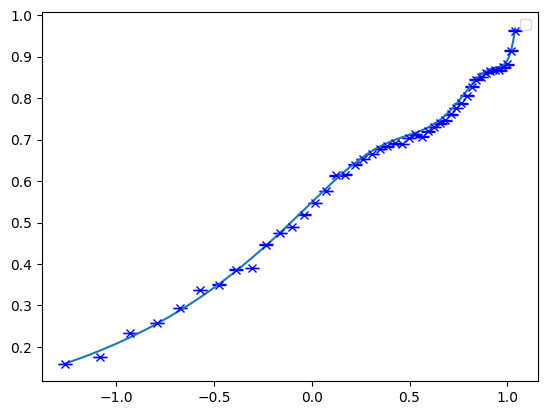

In [2]:
Ne = 9

x, entropy = LoadEntropy(Ne, 2*(Ne-1), 5e6, 1e5, "sphere", "circle", "free_fermions", np.arange(0.1, 1.001, 0.02))

#popt_ff, pcov_ff = np.polyfit(np.log(x)[25:], entropy[25:, 6]/x[25:], deg=1, cov=True)

boundaries = np.arange(0.1, np.pi/2, 0.01)
#boundaries = np.array([np.pi])
fqh = MonteCarloSphereFreeFermions(Ne, 2*(Ne-1), 0, 0, region_geometry='circle', region_size=0.1, linear_size=True, step_size=0.1)
S = fqh.ComputeEntropyED(boundaries, "r2")
Ls = np.sqrt(Ne-1)*np.sin(boundaries)

#popt_ff, pcov_ff = np.polyfit(np.log(Ls), S/(Ls), deg=1, cov=True)
#print(popt_ff[0])

#plt.plot(np.log(Ls), S/(Ls))

plt.errorbar(np.log(x), entropy[:, 6]/x, entropy[:, 7], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
plt.plot(np.log(Ls), S/Ls)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


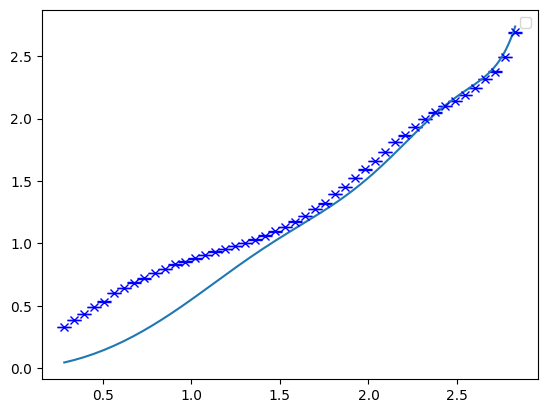

In [17]:
plt.errorbar(x, entropy[:, 6], entropy[:, 7], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
plt.plot(Ls, S)
plt.legend()

In [3]:
x, entropy = LoadEntropy(36, 70, 5e6, 1e5, "sphere", "circle", "free_fermions", np.arange(0.1, 0.981, 0.02))


popt_ff, pcov_ff = np.polyfit(np.log(x)[25:], entropy[25:, 6]/x[25:], deg=1, cov=True)

In [4]:
popt_ff

array([0.21915372, 0.6401919 ])

0.30480673514823947


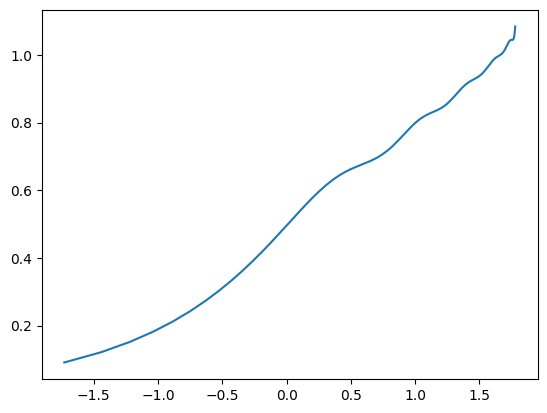

In [9]:
boundaries = np.arange(0.03, np.pi/2, 0.01)
#boundaries = np.array([np.pi])
Ne = 36
fqh = MonteCarloSphereFreeFermions(36, 70, 0, 0, region_geometry='circle', region_size=0.1, linear_size=True, step_size=0.1)
S = fqh.ComputeEntropyED(boundaries, "r2")
Ls = np.sqrt(Ne-1)*np.sin(boundaries)

popt_ff, pcov_ff = np.polyfit(np.log(Ls), S/(Ls), deg=1, cov=True)
print(popt_ff[0])

plt.plot(np.log(Ls), S/(Ls))

(1.0, 2.0)

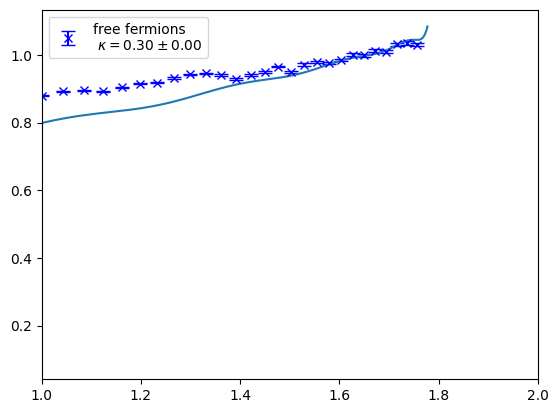

In [16]:
plt.errorbar(np.log(x), entropy[:, 6]/x, entropy[:, 7], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
plt.plot(np.log(Ls), S/Ls)
plt.legend()
plt.xlim(1,2)

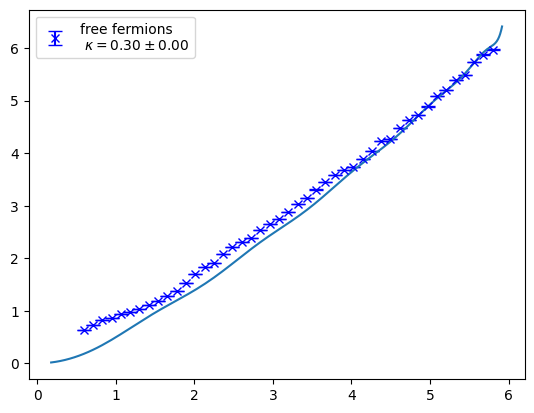

In [12]:
plt.errorbar(x, entropy[:, 6], entropy[:, 7], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
plt.plot(Ls, S)
plt.legend()

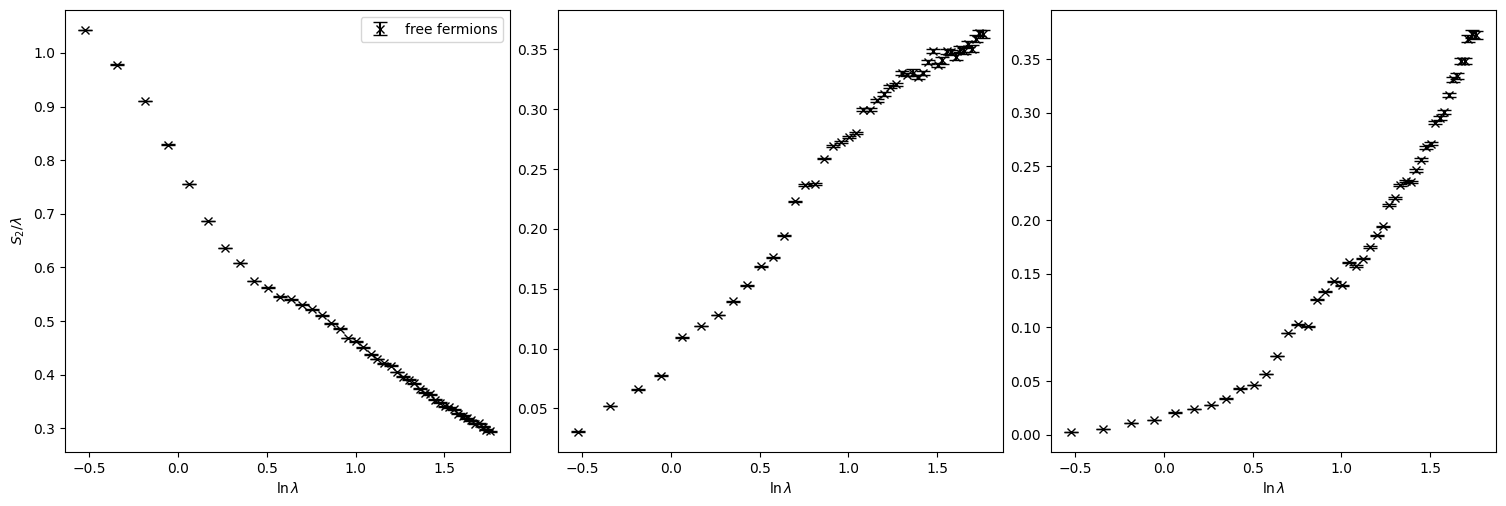

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
#fig.suptitle(f'Renyi entropy decomposition $S_2$, $N={Ne}$ ')


ax[0].errorbar(np.log(x), (entropy[:,0]/x), entropy[:,1], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='free fermions')

ax[0].legend()
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_ylabel('$S_{2}/\lambda$')
#ax[0].text(1.6,0.35,'p', fontsize=16)
#ax[0].set_xlim(0.5,1.85)
#ax[0].set_ylim(0.2,0.6)
#ax[0].set_title('$S_{2, \mathrm{p}}$')


ax[1].errorbar(np.log(x), (entropy[:,2]/x), entropy[:,3], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
#ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
#ax[1].text(1.2,0.8,'mod', fontsize=16)
#ax[1].set_title('$S_{2, \mathrm{mod}}$')
#ax[1].set_xlim(0.5,1.85)
#ax[1].set_ylim(0.1,1)


ax[2].errorbar(np.log(x), (entropy[:,4]/x), entropy[:,5], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
#ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
#ax[2].text(1.1,0.5,'sign', fontsize=16)
#ax[2].set_xlim(0.5,1.85)
#ax[2].set_ylim(0.,0.7)
#ax[2].set_title('$S_{2, \mathrm{sign}}$')
plt.tight_layout(pad=0.5)

#plt.savefig(f'entropy decomposition all fillings.pdf')  